In [1]:
import h5py
import cartopy.crs as ccrs
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.transform_xy import coor2coor
import numpy as np


In [34]:
path_img = 'data/rsimg/dianchi_s2_20200511_wgs84_100m.tif'
path_atl13 = 'data/icesat2/dianchi_ATL13_readout/dianchi_ATL13_2019_1q_subs.h5'
path_atl03 = 'data/icesat2/dianchi_ATL03_readout/dianchi_ATL03_2019_1q_subs.h5'


In [35]:
s2_img, s2_img_info = readTiff(path_img)
print(s2_img_info)


{'geoextent': (102.39869027893941, 102.93914220687806, 24.571857541195882, 25.128338224847997), 'geotrans': (102.39869027893941, 0.0009431970819173679, 0.0, 25.128338224847997, 0.0, -0.0009431875994103644), 'geosrs': '4326', 'row': 590, 'col': 573, 'bands': 6}


In [43]:
with h5py.File(path_atl13,'r') as f:
    print(f.keys())
    lat_atl13 = f['lat'][:]
    lon_atl13 = f['lon'][:]
    h_atl13 = f['h'][:]
    t_atl13 = f['t_dyr'][:]
    cycle_atl13 = f['cycle'][:]
    rgt_atl13 = f['rgt'][:]
    spot_atl13 = f['spot'][:]
print('number of points:', h_atl13.shape[0])
print('cycle_atl13:', np.unique(cycle_atl13))
print('rgt_atl13:', np.unique(rgt_atl13))

<KeysViewHDF5 ['beam_type', 'cycle', 'h', 'lat', 'lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>
number of points: 6319
cycle_atl13: [2.]
rgt_atl13: [ 263.  530.  705. 1147.]


In [42]:
with h5py.File(path_atl03,'r') as f:
    print(f.keys())
    lat_atl03 = f['lat'][:]
    lon_atl03 = f['lon'][:]
    h_atl03 = f['h'][:]
    t_atl03 = f['t_dyr'][:]
    cycle_atl03 = f['cycle'][:]
    rgt_atl03 = f['rgt'][:]
    spot_atl03 = f['spot'][:]
print('number of points:', h_atl03.shape[0])
print('cycle_atl13:', np.unique(cycle_atl03))
print('rgt_atl13:', np.unique(rgt_atl03))


<KeysViewHDF5 ['beam_type', 'cycle', 'h', 'lat', 'lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>
number of points: 1998896
cycle_atl13: [2.]
rgt_atl13: [  88.  530.  705.  972. 1147.]


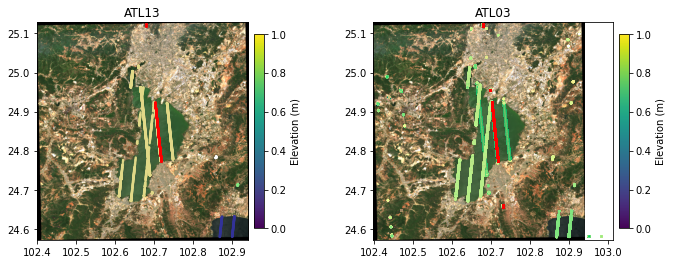

In [59]:
ids_atl13 = np.where((spot_atl13==4) & (rgt_atl13 == 530))[0]
ids_atl03 = np.where((spot_atl03==4) & (rgt_atl03 == 530))[0]

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
imgShow(s2_img, extent=s2_img_info['geoextent'], color_bands=(2, 1, 0), clip_percent=2)
plt.scatter(lon_atl13, lat_atl13, s=2, c=h_atl13, alpha=.7, cmap='terrain')
plt.scatter(lon_atl13[ids_atl13], lat_atl13[ids_atl13], s=2, color='red')
# plt.clim([1850,1860])
plt.title('ATL13')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

plt.subplot(1,2,2)
imgShow(s2_img, extent=s2_img_info['geoextent'], color_bands=(2, 1, 0), clip_percent=2)
plt.scatter(lon_atl03, lat_atl03, s=2, c=h_atl03, alpha=.7, cmap='terrain')
plt.scatter(lon_atl03[ids_atl03], lat_atl03[ids_atl03], s=2, color='red')
# plt.clim([1850,1860])
plt.title('ATL03')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


(24.75, 24.95)

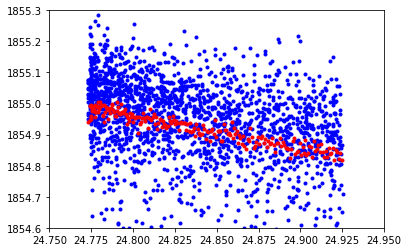

In [57]:
plt.plot(lat_atl03[ids_atl03][::10], h_atl03[ids_atl03][::10], 'b.')
plt.plot(lat_atl13[ids_atl13], h_atl13[ids_atl13], 'r.')
# plt.ylim(1854.8, 1855.)
plt.ylim(1854.6, 1855.3)
plt.xlim(24.75, 24.95)
